In [52]:
#required libs 

# linear algebra
import numpy as np 

#data frame
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# show first rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#show more information about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# take a copy from train dataframe
df = df_train.copy()

In [8]:
#check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
len(df.Cabin.unique())

148

fill nulls with mean & cabin

In [10]:
# fill nulls in age column with mean
# drop Cabin colmun
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.drop('Cabin', axis=1, inplace=True )

In [11]:
#check nulls again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
#drop any nulls in rows 
df.dropna(axis=0,how='any',inplace=True)

In [17]:
#check nuls
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
sum(df.duplicated())

0

In [21]:
#discover values in Survived columns
df.Survived.unique()

array([0, 1], dtype=int64)

In [18]:
#discover values in Embarked columns
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
#discover values in Pclass columns
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [23]:
#discover values in Sex columns
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [24]:
#discover values in SibSp columns
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
#discover values in parch columns
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [27]:
#discover values in ticket columns
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

In [30]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


<AxesSubplot:>

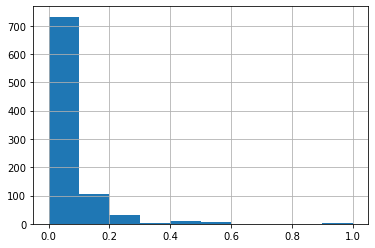

In [42]:
df['Fare'].hist()

In [39]:
#make a normalization
df['Fare'] = df['Fare'] / (df.Fare.max() - df.Fare.min())

In [43]:
#convert from cat. data to no. data
df = pd.get_dummies(df,columns= ["Embarked", "Sex"], drop_first=True)

In [47]:
# drop all not useful data
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [63]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.000000,1,0,0.014151,0,1,1
1,1,1,38.000000,1,0,0.139136,0,0,0
2,1,3,26.000000,0,0,0.015469,0,1,0
3,1,1,35.000000,1,0,0.103644,0,1,0
4,0,3,35.000000,0,0,0.015713,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,0.025374,0,1,1
887,1,1,19.000000,0,0,0.058556,0,1,0
888,0,3,29.699118,1,2,0.045771,0,1,0
889,1,1,26.000000,0,0,0.058556,0,0,1


In [49]:
#spilt feature and label
X = df.drop(['Survived'], axis=1)
y = df['Survived'] 

In [53]:
#spilt data to train test data
x_train, x_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
# create ml model and fit data
cl = DecisionTreeClassifier()
cl.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:

cl.score(x_train, y_train)

0.984984984984985

In [56]:
y_pred = cl.predict(x_test)

In [59]:
cl.score(x_test, y_test)

0.7533632286995515

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, y_pred)

array([[108,  33],
       [ 22,  60]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7533632286995515
